# Digit Recognition

## Naive Bayes Classifier

Naive bayes classifier is based on the baues theorem :  

$P( C | F_1 , ... , F_n ) = \frac{P( C )P( F_1 , ... , F_n | C )}{P( F_1 , ... , F_n )} $

We suppose that the attribute variables are independent then

$ P( F_1 , ... , F_n | C ) =   \prod_{i = 1}^{n} P( F_i | C )  $

$ P( F_1 , ... , F_n ) $ is independent of the class C  
we note : $ Z = P( F_1 , ... , F_n ) = \prod_{i = 1}^{n} P( F_i ) $  
Then the Naive Bayes equation bacame


$P( C | F_1 , ... , F_n ) = \frac{P( C )\prod_{i = 1}^{n} P( F_i | C )}{Z} $  

The Naive Bayes classifier rule is

X is a given sample with $ f_1 , ... , f_n $ attribute


X belong to $ C_i $ iff  
$ \forall j \neq i $ | $ P( C_i )\prod_{i = 1}^{n} P( F_i | C_i ) > P( C_j )\prod_{i = 1}^{n} P( F_i | C_j )$

## Gaussian Naive Bayes using GNB_classifier in sklearn library

### importing data


In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt


digits = datasets.load_digits()

### Preparing data

In [9]:
images = digits.images
labels = digits.target

n_samples = len(images)
images = images.reshape((n_samples, -1))


n_train = int(n_samples*0.8) #We train the model with 80% of samples in the DataSet 
n_test = n_samples - n_train #and we validate the model with the 20% of he samples 

### Splitting Data into Train and Test

In [10]:
X_train = images[:n_train]
X_test = images[n_train:]

Y_train = labels[:n_train]
Y_test = labels[n_train:]

### Creating the model

In [11]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, Y_train)

GaussianNB()

### Evalution

In [12]:
Y_predicted = GNB_model.predict(X_test)
print("The accuracy of the Gaussian Naive Bayes algorithm is : ")
print(GNB_model.score(X_test,Y_test))



The accuracy of the Gaussian Naive Bayes algorithm is : 
0.8138888888888889


In [13]:
print(classification_report(Y_test, Y_predicted ))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.68      0.69      0.68        36
           2       0.97      0.80      0.88        35
           3       0.96      0.59      0.73        37
           4       0.97      0.84      0.90        37
           5       0.80      0.97      0.88        37
           6       0.97      0.97      0.97        37
           7       0.65      0.89      0.75        36
           8       0.62      0.73      0.67        33
           9       0.74      0.68      0.70        37

    accuracy                           0.81       360
   macro avg       0.83      0.81      0.81       360
weighted avg       0.83      0.81      0.81       360



#### Confusion Matrix

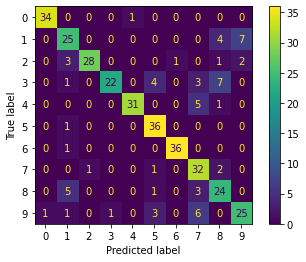

In [14]:


confusion_matrix(Y_test, Y_predicted)

confusion_matrix = confusion_matrix(Y_test, Y_predicted)
#plt.figure(figsize=(3, 3))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

disp.plot()
plt.show()


